In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle

%matplotlib inline

In [2]:
pickle_file = 'results_summary.pickle'

with open(pickle_file, 'rb') as handle:
    results_dict = pickle.load(handle)

In [3]:
def split_files(_dict):
    E50, E100, E200 = [], [], []
    for idx, f in enumerate(_dict.keys()):
        if _dict[f]['epochs'] == 50: E50.append(f)
        elif _dict[f]['epochs'] == 100: E100.append(f)
        elif _dict[f]['epochs'] == 200: E200.append(f)
    return E50, E100, E200

color = ['red', 'lightgreen', 'blue' ,'yellow' , 'lightgray', 'pink', 
         'orange', 'brown', 'purple', 'plum', 'gold', 'cyan']

for i, f in enumerate(results_dict.keys()):
    results_dict[f]['i'] = i
    results_dict[f]['color'] = color[i]

E50, E100, E200 = split_files(results_dict)
len(E50), len(E100), len(E200)

(8, 2, 2)

In [4]:
def annotate_bar(bar, ax, ha='center', va='bottom'):
    for b in bar:
        height = b.get_height()
        ax.annotate(f'{height}', xy=(b.get_x() + b.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha=ha, va=ha)
        
def annotate_barh(bar, ax, ha='center', va='center'):
    for b in bar:
        width = b.get_width()
        ax.text(b.get_width(), b.get_y() + 0.5 * b.get_height(), f'{width}', ha=ha, va=va)

In [5]:
def plot_train(_list, _dict=results_dict, color=color):
    # 0 = loss
    # 1 = accuracy
    # 2 = best_accuracy
    
    fig, (ax_l, ax_ba, ax_a) = plt.subplots(1, 3, figsize=(18, 6))
    
    for i,l in enumerate(_list):
        color = _dict[l]['color']  
        print(f'{_dict[l]["i"]} :: {l} :: {color}')
        
        ax_l.plot(range(_dict[l]['epochs']), _dict[l]['loss_values'], color=color)
        ax_l.set_title('Loss Values')
        
        bar = ax_ba.bar(i, _dict[l]['best_accuracy'], color=color)
        annotate_bar(bar, ax_ba)
        ax_ba.set_title('Best Accuracy')
        
        ax_a.scatter(range(_dict[l]['epochs']), _dict[l]['accuracies'], color=color)
        ax_a.set_title('Epoch Accuracy')

1 :: 20220714_122118 :: lightgreen
2 :: 20220714_175629 :: blue
5 :: 20220718_163533 :: pink
6 :: 20220719_171020 :: orange
7 :: 20220720_164044 :: brown
9 :: 20220725_152945 :: plum
10 :: 20220725_210216 :: gold
11 :: 20220727_141401 :: cyan


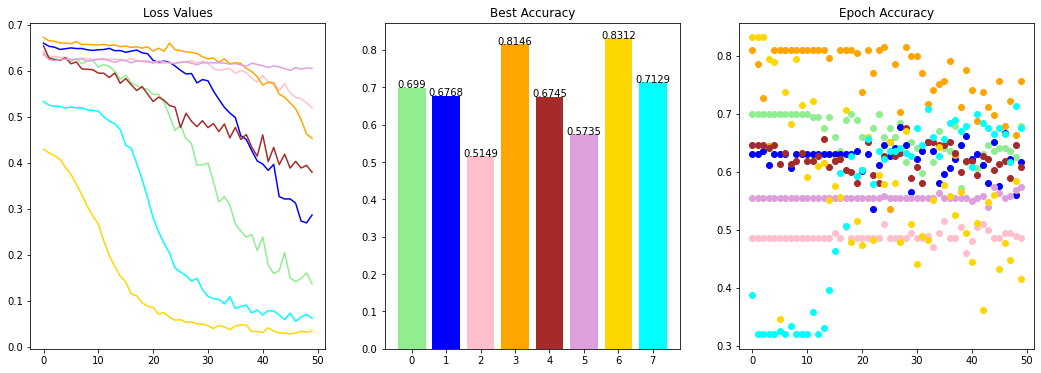

In [6]:
plot_train(E50)

0 :: 20220713_161939 :: red
3 :: 20220715_103840 :: yellow


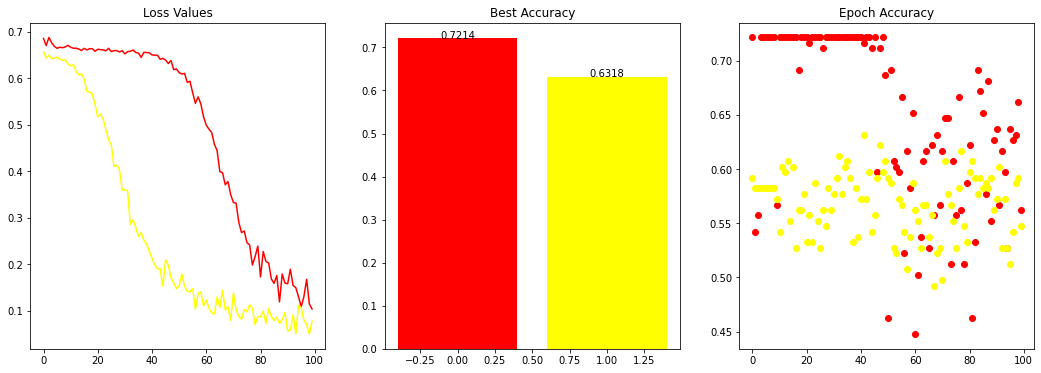

In [7]:
plot_train(E100)

4 :: 20220716_224403 :: lightgray
8 :: 20220721_172126 :: purple


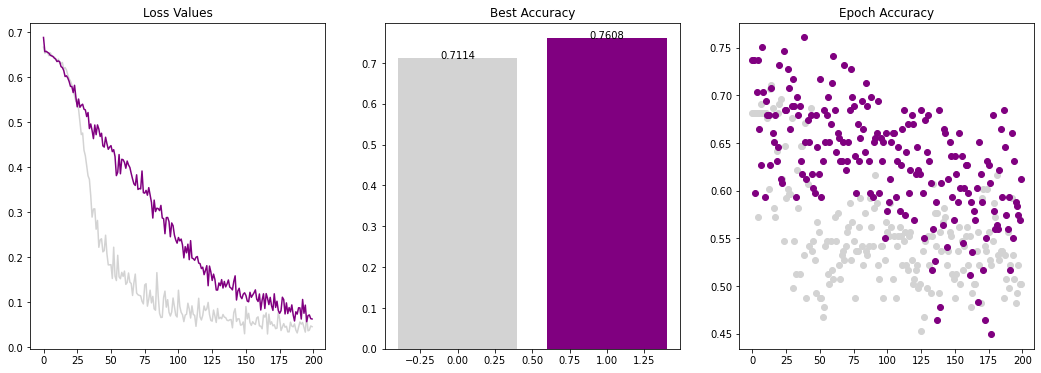

In [8]:
plot_train(E200)

0 :: 20220713_161939 :: red
1 :: 20220714_122118 :: lightgreen
2 :: 20220714_175629 :: blue
3 :: 20220715_103840 :: yellow
4 :: 20220716_224403 :: lightgray
5 :: 20220718_163533 :: pink
6 :: 20220719_171020 :: orange
7 :: 20220720_164044 :: brown
8 :: 20220721_172126 :: purple
9 :: 20220725_152945 :: plum
10 :: 20220725_210216 :: gold
11 :: 20220727_141401 :: cyan


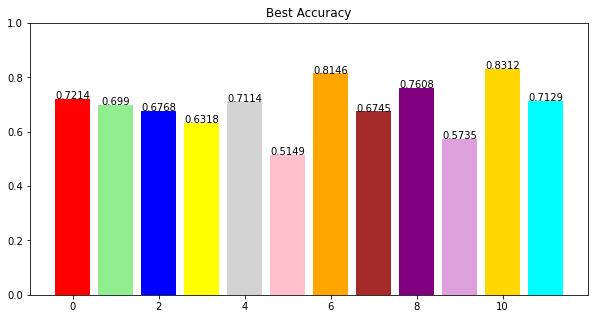

In [9]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5))

for i, l in enumerate(results_dict.keys()):
    color = results_dict[l]['color']  
    print(f'{results_dict[l]["i"]} :: {l} :: {color}')
        
    bar = axs.bar(i, results_dict[l]['best_accuracy'], color=color)
    axs.set_title('Best Accuracy')
    axs.set_ylim([0.0, 1.0])
    annotate_bar(bar, axs)

In [10]:
def plot_test_kpi(labels, _dict=results_dict, color=color): 
    fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(10, 10))
    
    for i, l in enumerate(_dict.keys()):
        color = _dict[l]['color']  
        print(f'{_dict[l]["i"]} :: {l} :: {color}')
        
        bar0 = ax0.bar(i, _dict[l][labels[0]], color=color)
        ax0.set_title(labels[0])
        annotate_bar(bar0, ax0)
        
        bar1 = ax1.bar(i, _dict[l][labels[1]], color=color)
        ax1.set_title(labels[1])
        annotate_bar(bar1, ax1)
        
        bar2 = ax2.bar(i, _dict[l][labels[2]], color=color)
        ax2.set_title(labels[2])
        annotate_bar(bar2, ax2)
        
        bar3 = ax3.bar(i, _dict[l][labels[3]], color=color)
        ax3.set_title(labels[3])
        annotate_bar(bar3, ax3)
        
        
def plot_test_metrics(labels, _dict=results_dict, color=color): 
    fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(10, 10))
    
    for i, l in enumerate(_dict.keys()):
        color = _dict[l]['color']  
        print(f'{_dict[l]["i"]} :: {l} :: {color}')
        
        bar0 = ax0.barh(i, _dict[l][labels[0]], color=color)
        ax0.set_title(labels[0])
        annotate_barh(bar0, ax0)
        
        bar1 = ax1.barh(i, _dict[l][labels[1]], color=color)
        ax1.set_title(labels[1])
        annotate_barh(bar1, ax1)
        
        bar2 = ax2.barh(i, _dict[l][labels[2]], color=color)
        ax2.set_title(labels[2])
        annotate_barh(bar2, ax2)
        
        bar3 = ax3.barh(i, _dict[l][labels[3]], color=color)
        ax3.set_title(labels[3])
        annotate_barh(bar3, ax3)

0 :: 20220713_161939 :: red
1 :: 20220714_122118 :: lightgreen
2 :: 20220714_175629 :: blue
3 :: 20220715_103840 :: yellow
4 :: 20220716_224403 :: lightgray
5 :: 20220718_163533 :: pink
6 :: 20220719_171020 :: orange
7 :: 20220720_164044 :: brown
8 :: 20220721_172126 :: purple
9 :: 20220725_152945 :: plum
10 :: 20220725_210216 :: gold
11 :: 20220727_141401 :: cyan


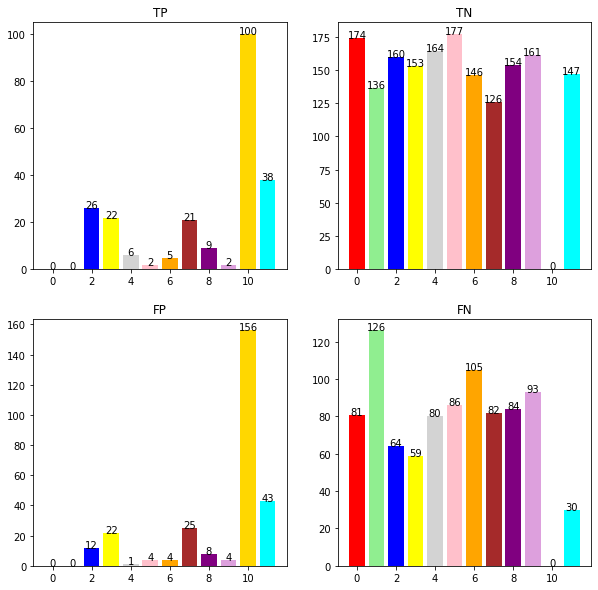

In [11]:
plot_test_kpi(['TP', 'TN', 'FP', 'FN'])

0 :: 20220713_161939 :: red
1 :: 20220714_122118 :: lightgreen
2 :: 20220714_175629 :: blue
3 :: 20220715_103840 :: yellow
4 :: 20220716_224403 :: lightgray
5 :: 20220718_163533 :: pink
6 :: 20220719_171020 :: orange
7 :: 20220720_164044 :: brown
8 :: 20220721_172126 :: purple
9 :: 20220725_152945 :: plum
10 :: 20220725_210216 :: gold
11 :: 20220727_141401 :: cyan


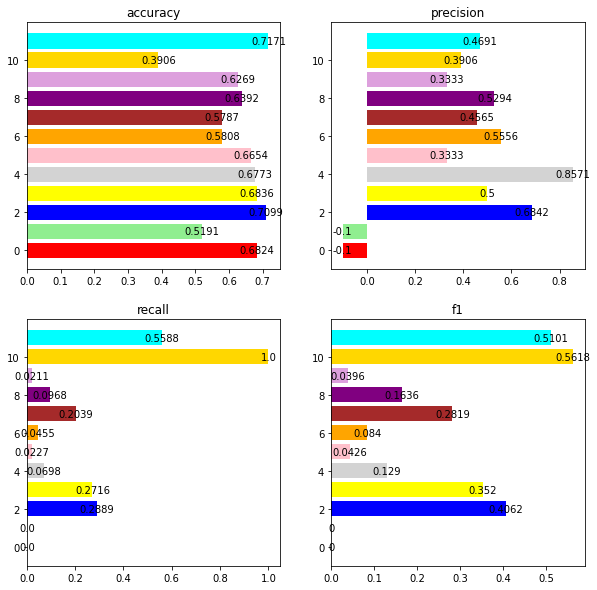

In [12]:
plot_test_metrics(['accuracy', 'precision', 'recall', 'f1'])

In [13]:
pd.DataFrame.from_dict(
    results_dict, 
    orient='index', 
    columns=[
        'i', 'color', 
        'loss_function', 'optimizer', 'learning_rate', 'epochs', 'best_accuracy',
        'accuracy', 'recall', 'precision', 'f1', 'TP', 'TN', 'FP', 'FN',
    ]
)

,i,color,loss_function,optimizer,learning_rate,epochs,best_accuracy,accuracy,recall,precision,f1,TP,TN,FP,FN
20220713_161939,0,red,Binary Cross Entropy,Adam,1e-3,100,0.7214,0.6824,0.0000,-0.1000,0.0000,0,174,0,81
20220714_122118,1,lightgreen,Binary Cross Entropy,Adam,1e-4,50,0.6990,0.5191,0.0000,-0.1000,0.0000,0,136,0,126
20220714_175629,2,blue,Binary Cross Entropy,Adam,1e-4,50,0.6768,0.7099,0.2889,0.6842,0.4062,26,160,12,64
20220715_103840,3,yellow,Binary Cross Entropy,Adam,1e-4,100,0.6318,0.6836,0.2716,0.5000,0.3520,22,153,22,59
20220716_224403,4,lightgray,Binary Cross Entropy,Adam,1e-4,200,0.7114,0.6773,0.0698,0.8571,0.1290,6,164,1,80
20220718_163533,5,pink,Binary Cross Entropy,Adam,1e-4,50,0.5149,0.6654,0.0227,0.3333,0.0426,2,177,4,86
20220719_171020,6,orange,Binary Cross Entropy,Adam,1e-4,50,0.8146,0.5808,0.0455,0.5556,0.0840,5,146,4,105
20220720_164044,7,brown,Binary Cross Entropy,Adam,1e-5,50,0.6745,0.5787,0.2039,0.4565,0.2819,21,126,25,82
20220721_172126,8,purple,Binary Cross Entropy,Adam,1e-5,200,0.7608,0.6392,0.0968,0.5294,0.1636,9,154,8,84
20220725_152945,9,plum,Binary Cross Entropy,SGD,1e-4,50,0.5735,0.6269,0.0211,0.3333,0.0396,2,161,4,93
